In [1]:
# Import the code for the classifier in this file and run everything here
# as a testing/results interface

In [2]:
# Insert top level directory into the system path so parent and sibling 
# modules can be imported 
import pathlib
import sys

# Convert path to use proper directory markers based on 
# operating system
PATH = str(pathlib.Path('../../'))

# Insert path to system path
sys.path.insert(0, PATH)

In [3]:
# THIS IS HERE JUST AS AN EXAMPLE. YOU CAN REMOVE THIS WHEN YOU START 
# WORKING ON IT
from FootballML.Classifiers.Individual.neural_network_classifier import test_data
import FootballML.Classifiers.Individual.neural_network_classifier as nnc

In [4]:
year=2012
x,y,xl,yl = nnc.test_data(year,year+7) 
xtrain, xvalid, xtest, ytrain, yvalid, ytest = nnc.prep_data(x,y,xl,yl)



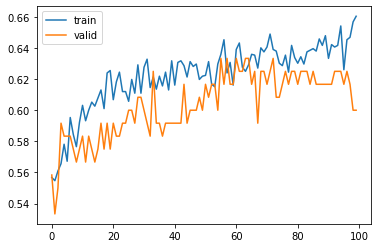

4/4 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6500
Test accuracy: 0.6499999761581421
INFO:tensorflow:Assets written to: nnc_model/assets


In [5]:
model = nnc.run_neural_network(2019)

In [6]:
model = nnc.hyperparam_tuned_neural_network()

In [7]:
y_pred=nnc.predict(xtest, model)

In [8]:
y_true=[]
for i in ytest:
    if i[1]==0:
        y_true.append([0])
    else:
        y_true.append([1])

In [9]:
import numpy as np

In [10]:
y_new=[]
for i in y_pred:
    if i>0.5:
        y_new.append([1])
    else:
        y_new.append([0])
        

In [11]:
from sklearn.metrics         import confusion_matrix

In [12]:
confusion_matrix(y_true, y_new)

array([[25, 27],
       [21, 47]])